In [237]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial.distance import cityblock
import numpy as np




In [238]:
df = pd.read_csv('Iris.csv')
td = pd.read_csv('Iris.csv')


In [239]:
df.head()


,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [240]:
df = df.drop('class', axis=1)
df.head()


,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [241]:
# valor Minino da classe Sepallength / valor Maximo da classe Sepallength
df["sepallength"].min() , df["sepallength"].max()


(4.3, 7.9)

In [242]:
# valor Minimo da classe Sepalwidth /valor Maximo da classe Sepalwidth
df["sepalwidth"].min() ,df["sepalwidth"].max()


(2.0, 4.4)

In [243]:
# valor Minimo da classe petallength /  valor Maximo da classe petallength
df["petallength"].min() , df["petallength"].max()


(1.0, 6.9)

In [244]:
# valor Minimo da classe petalwidth /valor Maximo da classe petalwidth
df["petalwidth"].min() ,df["petalwidth"].max()


(0.1, 2.5)

{'whiskers': [<matplotlib.lines.Line2D at 0x13c5d51e5c0>,
 'caps': [<matplotlib.lines.Line2D at 0x13c5d51eb60>,
 'boxes': [<matplotlib.lines.Line2D at 0x13c5d51e2f0>,
 'medians': [<matplotlib.lines.Line2D at 0x13c5d51f100>,
 'fliers': [<matplotlib.lines.Line2D at 0x13c5d51f3d0>,
 'means': []}

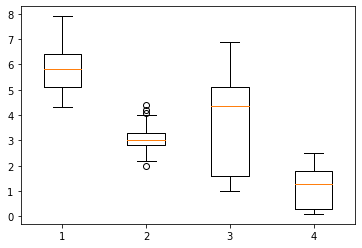

In [245]:
plt.boxplot(df)


{'whiskers': [<matplotlib.lines.Line2D at 0x13c5d5aa770>,
 'caps': [<matplotlib.lines.Line2D at 0x13c5d5aad10>,
 'boxes': [<matplotlib.lines.Line2D at 0x13c5d5aa4a0>],
 'medians': [<matplotlib.lines.Line2D at 0x13c5d5ab2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x13c5d5ab580>],
 'means': []}

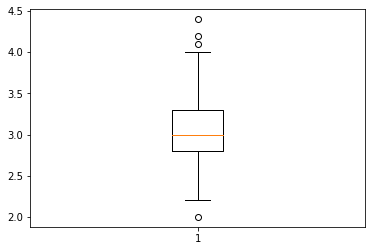

In [246]:
plt.boxplot(df.sepalwidth)


In [247]:
Q1 = df.sepalwidth.quantile(0.25)
Q3 = df.sepalwidth.quantile(0.75)
Q1, Q3


(2.8, 3.3)

In [248]:
IQR = Q3-Q1
IQR


0.5

In [249]:
LowrL = Q1-1.5*IQR
UperL = Q3+1.5*IQR
LowrL, UperL


(2.05, 4.05)

In [250]:
df[(df.sepalwidth < LowrL) | (df.sepalwidth > UperL)]


,sepallength,sepalwidth,petallength,petalwidth
15,5.7,4.4,1.5,0.4
32,5.2,4.1,1.5,0.1
33,5.5,4.2,1.4,0.2
60,5.0,2.0,3.5,1.0


In [251]:
df2 = df[(df.sepalwidth > LowrL) & (df.sepalwidth < UperL)]
df2.shape



(146, 4)

In [252]:
td2 = td[(td.sepalwidth > LowrL) & (td.sepalwidth < UperL)]

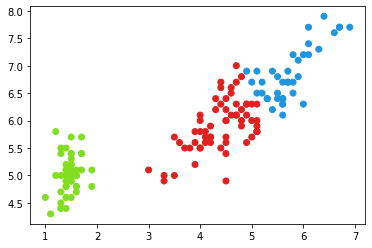

In [253]:
k_means=KMeans(n_clusters=3,random_state=0).fit(df)
colors = ['#DF2020', '#81DF20', '#2095DF']
k_means.labels_
df['cluster'] = k_means.fit_predict(df)
centroids=k_means.cluster_centers_
cen_x=[i[0]for i in centroids]
cen_y=[i[1]for i in centroids]
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
plt.scatter(df.petallength,df.sepallength,c=df.c)

In [234]:
#
def valordeSSe(clusters):
    sse = 0.0
    for c in clusters:
        tt = 0.0
        c_centroid = c.centroid.coords
        for po in c.points:
            tt += reduce(lambda x, y: x + pow((po.coords[y]- c.centroid.coords[y]), 2),
                 range(po.n), 0.0)
        sse += tt
    return sse       


In [235]:
#Codigo da Coeficiente de Silhouette
def fazerSiLh(df, x):
    wss = []
    valores = []
    ai = 0.0
    bi = 0.0
    si = 0.0
    for quantidade in range(x):
        valores.append(df[df['cluster'] == quantidade].to_numpy())
    for m in range(len(valores)):
        for i in range(len(valores[m])):
            for t in range(len(valores[m])-1):
                ci= cityblock(valores[m][i], valores[m][t+1])
                if(ci != 1):
                    ai+=ci
    ai = 1/ai-1

    for m in range(len(valores)-1):
        for i in range(len(valores[m])):
            for t in range(len(valores[m+1])):
                cj = cityblock(valores[m][i], valores[m+1][t])
                if(cj != 1):
                    bi+=cj

    bi = 1/bi

    if(ai < bi):
        wss.append((1-ai/bi)/100)
    elif ai == bi:
        wss.append(0)
    else:
        wss.append((bi/ai-1)/100)
    return wss


[[396.05893806972205],
 [313.02492445812857],
 [261.8527026633594],
 [239.08178336921404],
 [202.33901266213067],
 [189.275296742455],
 [176.9928025645531],
 [156.70093711866542],
 [158.0560365926813]]

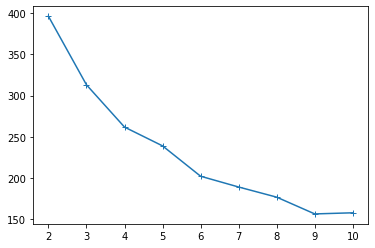

In [236]:
wss=[]

for i in range(2, 11):
    k_means = KMeans(n_clusters=i, random_state=0).fit(df)
    k_means.labels_
    df['cluster'] = k_means.fit_predict(df)
    centroids = k_means.cluster_centers_
    cen_x=[i[0]for i in centroids]
    #wss.append(k_means.inertia_)
    cen_y=[i[1]for i in centroids]
    wss.append(fazerSiLh(df, i))

plt.plot(range(2, 11), wss, marker="+")

wss